In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('SMSSpamCollection', sep = '\t', names=['label', 'text'])

In [3]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.shape

(5572, 2)

In [5]:
!pip install nltk

In [6]:
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
sent = 'Hello friends! How are you?'

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [10]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [11]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [12]:
clean

['Hello', 'friends', '!', 'How', '?']

In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]

In [14]:
clean

['hello', 'friend', '!', 'how', '?']

In [15]:
sent = 'Hello friends! How are you? We are doing the work today.'

In [16]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return (clean)

In [17]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'work', 'today']

In [18]:
#Pre-processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [20]:
x = data['text']
y = data['label']

In [21]:
x_new = tfidf.fit_transform(x)

In [22]:
x.shape

(5572,)

In [23]:
x_new.shape

(5572, 6513)

In [24]:
 y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [25]:
#Cross-Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y,random_state=0, test_size=0.25)

In [26]:
x_train.shape

(4179, 6513)

In [27]:
x_test.shape

(1393, 6513)

In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
nb = GaussianNB()
mb = MultinomialNB()

In [46]:
nb.fit(x_train.toarray(), y_train)
mb.fit(x_train.toarray(), y_train)

MultinomialNB()

In [47]:
y_pred = nb.predict(x_test.toarray())
y_pred2 = mb.predict(x_test.toarray())

In [48]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

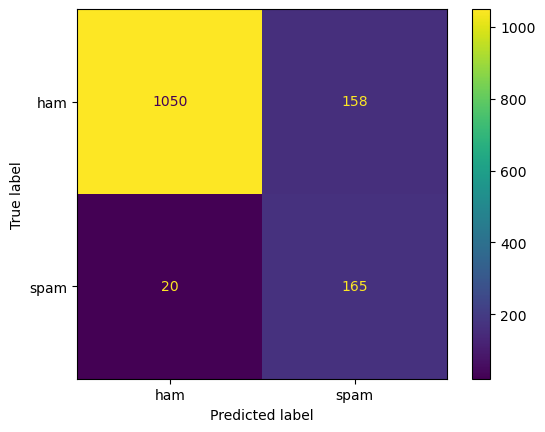

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

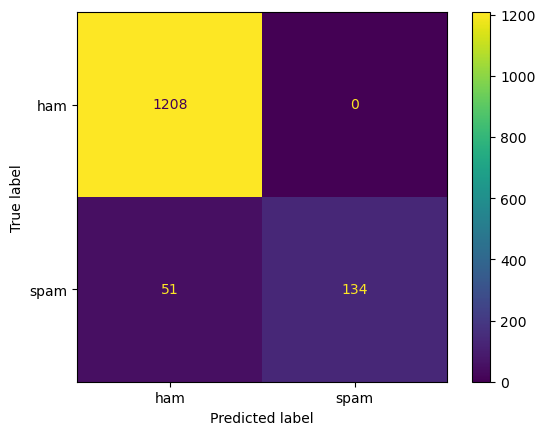

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2);

In [50]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [51]:
accuracy_score(y_test, y_pred)

0.8722182340272793

In [52]:
accuracy_score(y_test, y_pred2)

0.9633883704235463

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(random_state=0)

In [56]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_pred = rf.predict(x_test)

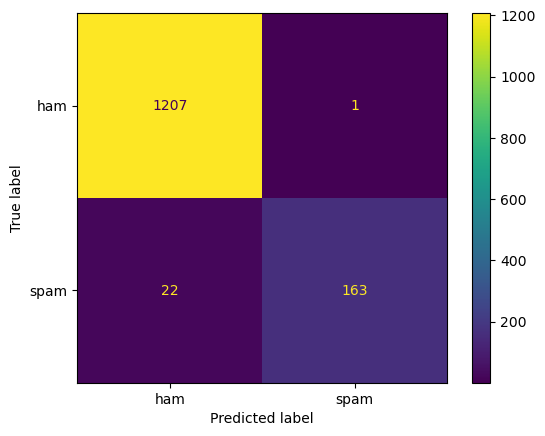

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [59]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [65]:
accuracy_score(y_test, y_pred)

0.9641062455132807

In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)

0.9641062455132807

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
y_pred = decision.predict(x_test)
accuracy_score(y_test, y_pred)

0.9569274946159368